---Iteration:  0
0.5 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

---Iteration:  1
0.5 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

---Iteration:  2
0.5 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

---Iteration:  3
0.5 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

---Iteration:  4
0.5 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.5 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

0.7833333333333334 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.0666666666666669 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.35 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.6333333333333335 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

1.916666666666667 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.01


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.02


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.03


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

2.2 0.05


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-

By Cross Validation - Chosen C for SVM:  1.6333333333333335
By Cross Validation - Chosen Gamma for SVM:  0.04


/Users/zhen/Desktop/Bank-Marketing-Data-Analysis/newenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training Confusion Matrix:
  [[2435  310]
 [ 101  243]]

Testing Confusion Matrix:
  [[813 110]
 [ 64  43]]

Training Accuracy Score:  0.8669472321139527

Testing Accuracy Score:  0.8310679611650486

Training Precision:  0.4394213381555154

Testing Precision:  0.28104575163398693

Training Recall:  0.7063953488372093

Testing Recall:  0.40186915887850466

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      2745
           1       0.44      0.71      0.54       344

    accuracy                           0.87      3089
   macro avg       0.70      0.80      0.73      3089
weighted avg       0.90      0.87      0.88      3089


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       923
           1       0.28      0.40      0.33       107

    accuracy                           0.83      1030
   macro avg       0.60      0.64 

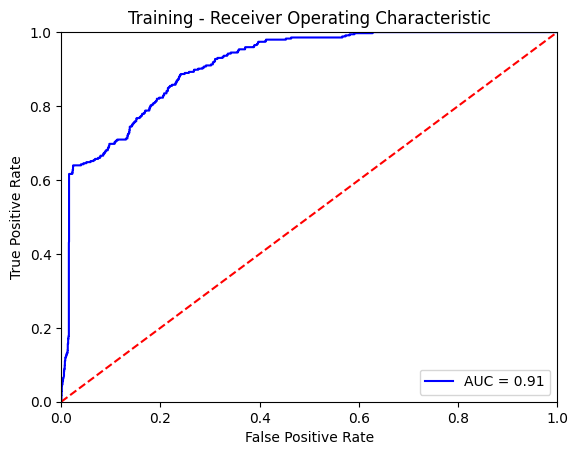

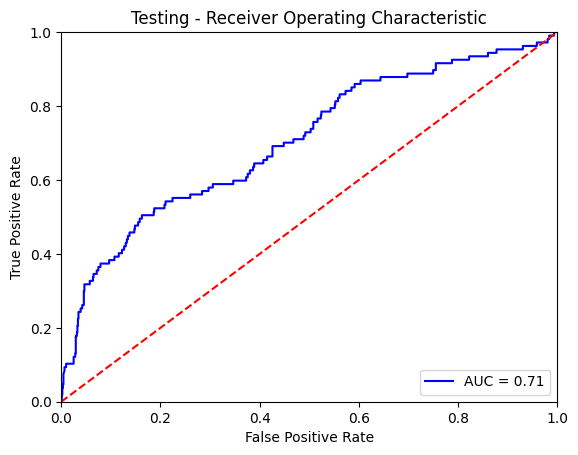

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 25 21:51:20 2018

@author: abinaya
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from evaluate_classifier_performance import evaluate_classifier_performance

df_train = pd.read_csv('Data/bank-additional-preprocessed-mode-standardize-train.csv')
df_test = pd.read_csv('Data/bank-additional-preprocessed-mode-standardize-test.csv')

del df_train['Unnamed: 0']
del df_test['Unnamed: 0']

df_train_class = pd.DataFrame(df_train['y'])    
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']
    

### Support Vector Machine Model

C_list = np.linspace(0.5, 2.2, 7)
gamma_list = np.linspace(0.01, 0.05, 5)

skf_model = StratifiedKFold(n_splits=10,shuffle=True)

max_iterations = 5
for t in range(0,max_iterations):
    print("---Iteration: ", t)
    AVG_ACC = np.zeros(shape=[len(C_list),len(gamma_list)])
    STD_ACC = np.zeros(shape=[len(C_list),len(gamma_list)])
    
    x_count = 0
    for c_value in C_list:
        
        y_count = 0
        for gamma_value in gamma_list:
            print(c_value, gamma_value)

            temp_accuracy_list = []
            for train_subset_index, cv_index in skf_model.split(df_train_features,df_train_class):
                df_train_features_subset = df_train_features.loc[train_subset_index]
                df_train_class_subset = df_train_class.loc[train_subset_index]
                df_train_features_cv = df_train_features.loc[cv_index]
                df_train_class_cv = df_train_class.loc[cv_index]
                
                svm_model = SVC(C = c_value, gamma = gamma_value, kernel = 'rbf', class_weight= 'balanced')
                svm_model.fit(df_train_features_subset, df_train_class_subset)
                score_value = svm_model.score(df_train_features_cv, df_train_class_cv)
                temp_accuracy_list.append(score_value)
            
            AVG_ACC[x_count,y_count] = np.mean(temp_accuracy_list)
            STD_ACC[x_count,y_count] = np.std(temp_accuracy_list)
            y_count += 1
            
        x_count += 1
    
    if t==0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.dstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.dstack([final_STD_ACC, STD_ACC])
             
final_accuracy_mean_list = np.mean(final_AVG_ACC, axis=2)
max_ind = np.unravel_index(np.argmax(final_accuracy_mean_list, axis=None), final_accuracy_mean_list.shape)

chosen_C = C_list[max_ind[0]]
chosen_gamma = gamma_list[max_ind[1]]

print("By Cross Validation - Chosen C for SVM: ", chosen_C)
print("By Cross Validation - Chosen Gamma for SVM: ", chosen_gamma)

svm_model_final = SVC(C=chosen_C, gamma=chosen_gamma, kernel='rbf', class_weight='balanced', probability=True)

svm_model_final.fit(df_train_features, df_train_class)
                     
predicted_train = svm_model_final.predict(df_train_features)
predicted_test = svm_model_final.predict(df_test_features)

# Remove unnecessary initialization

predicted_prob_train = svm_model_final.predict_proba(df_train_features)
predicted_prob_test  = svm_model_final.predict_proba(df_test_features)

evaluate_classifier_performance(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')
